### Santiago Escobar Calderón
### Inteligencia Artifical Aplicada al territorio
### cod:20182025162

## Web scrapping para la automatización de creaciones de Bases de datos

La siguiente presentación que se hará tiene que ver con el uso de web scrapping para la obtención de datos, para ello es importante mencionar varias cosas del web scrapping antes de empezar:

* El webscrapping no tiene una forma mecánica de hacerse, es decir, no se puede seguir el mismo proceso para todas las páginas donde se quieran rascar los datos.
* Hay que tener nociones básicas de como funciona el lenguaje etiquetado HTML y el lenguaje de programación JavaScript para poder reconocer los patrones de busqueda de los elementos en las páginas.
* Los filtros que se utilizan durante el web scrapping se manejan casi en su totalidad con regular expressions por lo cual es necesario saber de estas


### Lo primero que se hará antes de empezar a hacer el webscrapping es manejar ciertas librerías importantes como por ejemplo

* Selenium: La cual permite crear el driver de donde se sacará el contenido HTML de la página
* BeautifulSoup: la cual permite extraer los datos asociados a las etiquetas de los distintos elementos de la página
* Regular exprssion: que permite crear patrones de busqueda entre carácteres

In [33]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Para poder empezar a utilizar el webscrapping se tiene que crear un objeto de la calse webdriver la cual permitirá al proceso de automatización e interactuar con un navegador web y realizar acciones automatizadas, como abrir páginas web, llenar formularios, hacer clic en elementos y extraer información.

In [21]:
driver=webdriver.Chrome()

#### En esta parte del proceso de automatización se obtendrá la página de la cual se pretende hacer el scrapeo de los datos, en este caso los inmuebles de Bogotá ubicados en el barrio Chapinero

In [22]:
driver.get('https://listado.mercadolibre.com.co/casas-bogota-chapinero#D[A:casas%20bogota%20chapinero]')
Contenido=driver.page_source
soup=BeautifulSoup(Contenido)


In [23]:
#Creación de las listas para el filtro de elementos
Precio=[]
Area=[]
Habitaciones=[]


#### Esta parte consiste en la extracción de elementos basados en la clase que permite ver los precios de los inmuebles en la localidad de chapinero, al encontrar todos estos elementos, sólo se añadirá la parte textual que compone a todas estas clases, después de haber realizado esto se hará un filtro mediante una regular expression la cual está definida mediante la variable patrón

In [24]:
elementos = soup.find_all(class_="ui-search-item__group ui-search-item__group--price shops__items-group")
for elemento in elementos:
    Precio.append(elemento.text)
    
#Crear la regular expresion que permita hacer el compilado de datos

patron = re.compile(r'(\d[\d.]*)\s*pesos')

#Crear los precios

PrecioSucio=[]

for dato in Precio:
    Filtro=patron.search(dato)
    if Filtro:
        numero = Filtro.group(1).replace(".", "")
        PrecioSucio.append(numero)



## Filtro para la variable de área

In [26]:
elementos2 = soup.find_all(class_="ui-search-item__group ui-search-item__group--attributes shops__items-group")

for elemento2 in elementos2:
    Area.append(elemento2.text)
## Creamos el patrón para los datos

patron1 = re.compile(r'\d{3}')


AreaSucia=[]
for dato in Area:
    Filtro=patron1.search(dato)
    if Filtro:
        numero=Filtro.group()
        AreaSucia.append(numero)
        
    

## Filtro para la variable de  Habitaciones

In [28]:
elementos3 = soup.find_all(class_="ui-search-item__group ui-search-item__group--attributes shops__items-group")

for elemento2 in elementos2:
    Habitaciones.append(elemento2.text)
## Creamos el patrón para los datos

patron2 = re.compile(r'cubiertos(\d+)')


HabitacionSucia=[]
for dato in Habitaciones:
    Filtro=patron2.search(dato)
    if Filtro:
        numero=Filtro.group(1)
        HabitacionSucia.append(numero)

In [25]:
len(PrecioSucio)

48

In [27]:
len(AreaSucia)

48

In [29]:
len(HabitacionSucia)

46

#### Para poder crear el dataframe que es un objeto de la clase dataframe del módulo pandas se debe tener en cuenta que todos las listas tienen que tener la misma longitud, por lo tanto en las siguiente dos líneas se hace el recorte de los datos para generar una misma cantidad de datos para cada lista

In [30]:
### Anidado de datos


PrimerRecorte=2

PrecioSucio=PrecioSucio[:-PrimerRecorte]

SegundoRecorte=2

AreaSucia=AreaSucia[:-SegundoRecorte]


In [60]:
Datos = {'Precio': PrecioSucio, 'Area': AreaSucia, 'Habitaciones': HabitacionSucia}
df=pd.DataFrame(Datos)



In [61]:
df.head(5)

,Precio,Area,Habitaciones
0,1338134411,466,10
1,2500000000,520,5
2,1300000000,158,3
3,590000000,172,5
4,3100000000,572,11


### NOTA!!!
#### Hay que tener muy presente que los elementos de la lista que se crean no se pueden utilizar sino que se deben cambiar el tipo de dato ya que por defecto no vienen configurados, por lo tanto eso es lo que se hará

In [63]:
df['Precio']=df['Precio'].astype(float)
df['Area']=df['Area'].astype(int)
df['Habitaciones']=df['Habitaciones'].astype(int)



### Mediante una forma gráfica se pretenderá ver cuales son los registros que se encuentran muy alejados de la media y de acuerdo a estos se eliminarán en un futuro

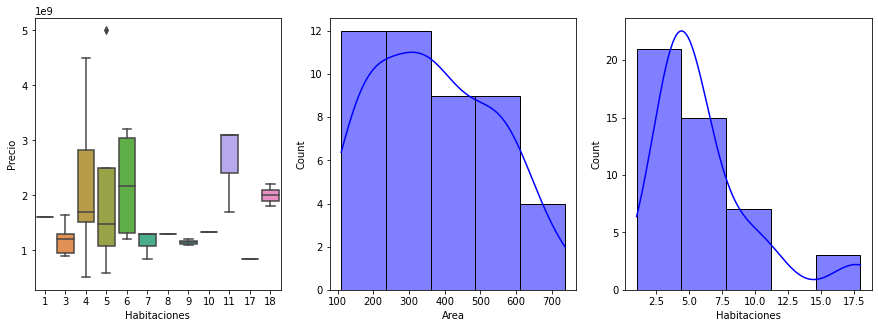

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0]=sns.boxplot(x=df['Habitaciones'], y=df['Precio'], data=df,ax=axes[0])
axes[1]=sns.histplot(x=df['Area'], bins=5, kde=True, color='blue',ax=axes[1])
axes[2]=sns.histplot(x=df['Habitaciones'], bins=5, kde=True, color='blue',ax=axes[2])








### Al poder hallar que los puntos que más se alejaban de la media eran los que pertenecían a la variable de habitaciones, se decidió eliminar estos mediante el siguiente código

In [64]:
df = df.drop(df[df['Habitaciones'] > 10].index)


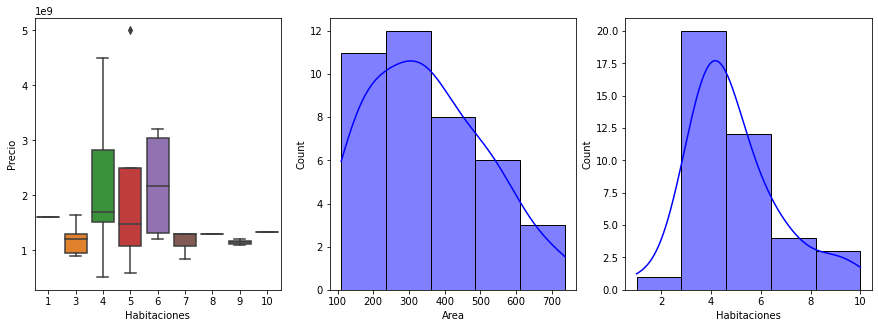

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0]=sns.boxplot(x=df['Habitaciones'], y=df['Precio'], data=df,ax=axes[0])
axes[1]=sns.histplot(x=df['Area'], bins=5, kde=True, color='blue',ax=axes[1])
axes[2]=sns.histplot(x=df['Habitaciones'], bins=5, kde=True, color='blue',ax=axes[2])

#### En la siguiente línea se eliminarán los registros vacíos, esto se debe hacer en aras de limpieza de los datos, en el trabajo que se hizo no es necesario ya que no se tienen registros vacíos

In [69]:
df=df.dropna()


### Por último se guardará en un archivo .csv para guardar información para el futuro

In [76]:
df.to_csv('CasasChapinero.csv', index=True)